In [1]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd

In [5]:
f1 = files.upload()
ff_df = pd.read_csv(io.BytesIO(f1['FREEFIRE_LOGREG_GIRISH.csv']))

Saving FREEFIRE_LOGREG_GIRISH.csv to FREEFIRE_LOGREG_GIRISH (1).csv


In [6]:
ff_df.head(7)

,WIN_RATE,TOP 3 RATE,K/D,MOST KILLS,HEADSHOT RATE,HEROIC LABEL
0,57.90,84.42,4.00,9,13.42,0
1,62.15,81.28,9.56,18,18.37,1
2,57.82,83.28,10.01,18,25.29,1
3,55.61,83.48,4.53,10,20.62,0
4,63.59,84.63,7.11,12,14.83,1
5,3.42,17.12,0.84,11,19.33,0
6,25.00,37.50,3.03,8,5.49,0


In [7]:
plt.style.use('ggplot')

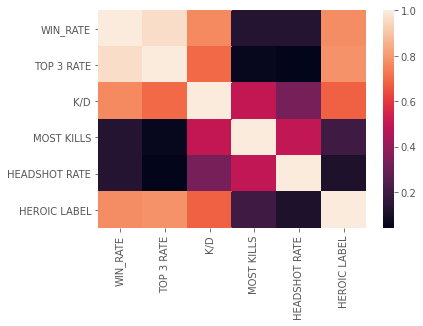

In [8]:
sns.heatmap(ff_df.corr())

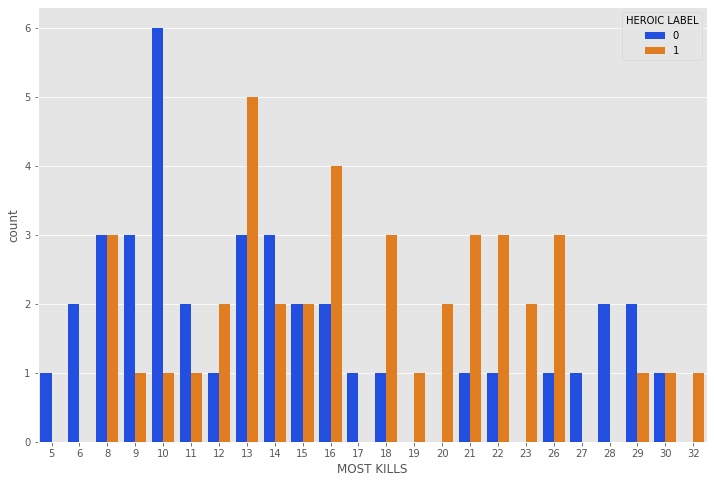

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'MOST KILLS' , hue = 'HEROIC LABEL' , data = ff_df , palette='bright')

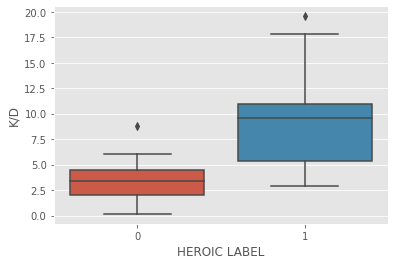

In [10]:
sns.boxplot(x = 'HEROIC LABEL' , y = 'K/D' , data = ff_df)

In [11]:
X = ff_df[['WIN_RATE', 'TOP 3 RATE', 'K/D',
       'MOST KILLS', 'HEADSHOT RATE']]
Y = ff_df['HEROIC LABEL']

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state = 7)

In [14]:
from sklearn.linear_model import LogisticRegression
ff_lg = LogisticRegression()
ff_lg.fit(X_train , Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = ff_lg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.88      0.93        16

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.93        27
weighted avg       0.94      0.93      0.93        27



In [ ]:
test_value = np.array([50.63,72.23,5.9,23,15.96]).reshape(-1,5)
print("EST. HEROIC LABEL"  , ff_lg.predict(test_value))

EST. HEROIC LABEL [1]
